# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [4]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
612,2024-12-17,31,31,21,67.741935,32.258065,79.8360,easy,2024-12-17
613,2024-12-18,30,27,23,85.185185,14.814815,94.4170,easy,2024-12-18
614,2024-12-19,29,26,23,88.461538,11.538462,82.0555,easy,2024-12-19
615,2024-12-20,26,25,24,96.000000,4.000000,53.4700,easy,2024-12-20


In [34]:
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
612,2024-12-17,31,31,21,67.741935,32.258065,79.8360,easy,2024-12-17
613,2024-12-18,30,27,23,85.185185,14.814815,94.4170,easy,2024-12-18
614,2024-12-19,29,26,23,88.461538,11.538462,82.0555,easy,2024-12-19
615,2024-12-20,26,25,24,96.000000,4.000000,53.4700,easy,2024-12-20


How many people are playing Reflect?

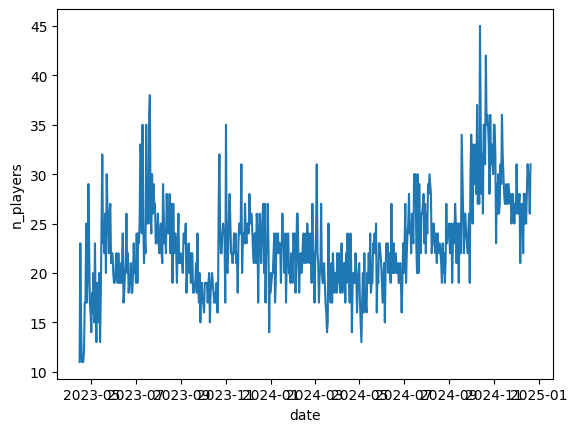

In [5]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [6]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

2050

## Features

In [7]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2024-12-17,31,31,21,67.741935,32.258065,79.8360,easy,2024-12-17,puzzle-2024-12-17.txt,...,5.000000,8,25,4,0,2,1,10,5,NaN
613,2024-12-18,30,27,23,85.185185,14.814815,94.4170,easy,2024-12-18,puzzle-2024-12-18.txt,...,4.600000,7,23,4,0,2,1,8,5,NaN
614,2024-12-19,29,26,23,88.461538,11.538462,82.0555,easy,2024-12-19,puzzle-2024-12-19.txt,...,4.833333,7,29,2,0,2,1,9,5,NaN
615,2024-12-20,26,25,24,96.000000,4.000000,53.4700,easy,2024-12-20,puzzle-2024-12-20.txt,...,3.571429,6,25,0,0,2,1,10,5,NaN


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

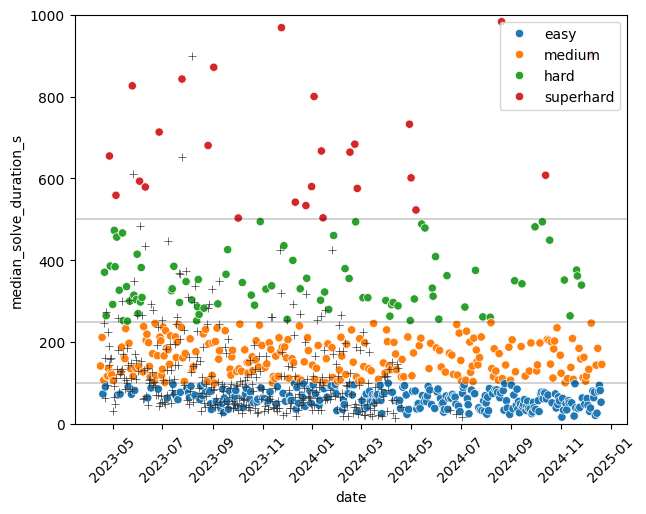

In [8]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

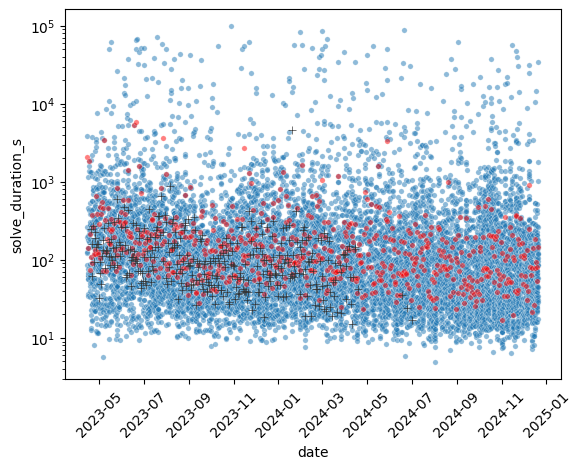

In [9]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

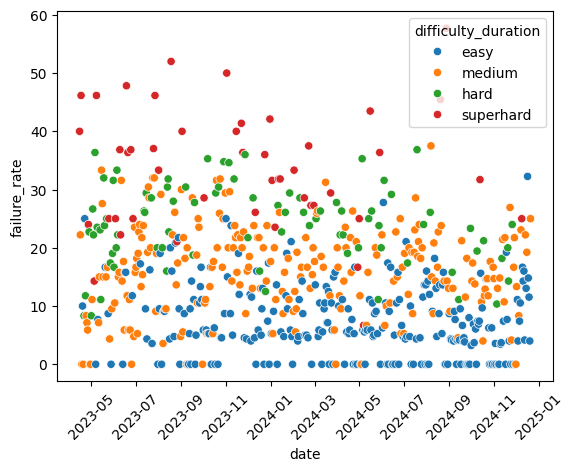

In [10]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [11]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [12]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [13]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.525323,0.101486,0.024812,0.104426,0.102687,0.048181,0.115172,0.054596,0.098741,0.109014,0.053307,-0.019916,0.063019,0.143346,0.153169,0.134490,0.111056
failure_rate,0.525323,1.000000,0.173869,0.070845,0.156846,0.107147,0.085603,0.139820,0.120936,0.146929,0.200475,0.023127,-0.054520,0.143284,0.155751,0.271746,0.128380,0.110051
excess_beam_distance,0.153169,0.271746,-0.149874,-0.261144,-0.146548,0.207291,0.110953,0.161747,-0.024121,0.009187,-0.128152,0.143564,0.316589,0.613581,0.290068,1.000000,-0.013644,-0.081213
total_beam_distance,0.143346,0.155751,0.171718,0.090484,0.368830,0.264664,-0.173632,0.100913,0.048402,0.190390,-0.041517,0.298225,0.222466,0.293619,1.000000,0.290068,0.064595,0.024399
excess_reflections,0.134490,0.128380,0.272593,-0.172878,-0.130871,0.422466,0.390700,0.315389,-0.069517,0.032741,-0.057824,0.270118,0.137749,0.020442,0.064595,-0.013644,1.000000,0.786206
max_blocks_per_beam,0.115172,0.139820,0.087688,-0.158974,-0.053060,0.321174,0.252023,1.000000,-0.233171,0.106631,-0.002790,0.217124,0.094065,0.203457,0.100913,0.161747,0.315389,-0.024586
num_excess_reflection_beams,0.111056,0.110051,0.269420,-0.019842,-0.000853,0.306421,0.340779,-0.024586,0.078556,0.157652,0.175197,0.185883,-0.025328,-0.151822,0.024399,-0.081213,0.786206,1.000000
max_beams_per_block,0.109014,0.200475,0.070885,0.456118,0.599309,-0.186215,-0.088787,-0.002790,0.298772,0.624450,1.000000,-0.251600,-0.638642,-0.252379,-0.041517,-0.128152,-0.057824,0.175197
num_beams,0.104426,0.156846,0.092508,0.803731,1.000000,-0.129796,-0.476445,-0.053060,0.209533,0.742339,0.599309,0.223683,-0.798191,-0.198955,0.368830,-0.146548,-0.130871,-0.000853
num_reflections,0.102687,0.107147,0.457442,-0.440279,-0.129796,1.000000,0.732086,0.321174,0.520335,0.193161,-0.186215,0.668238,0.265882,0.022510,0.264664,0.207291,0.422466,0.306421


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
np.random.seed(42)

In [16]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [17]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [18]:
response_variable = "median_solve_duration_s"

In [19]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

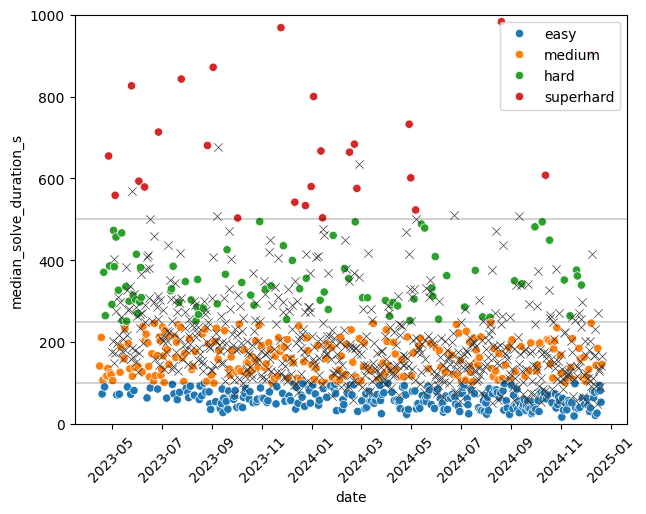

In [20]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');